<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200513_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###두 모집단의 가설검정

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import proportion as prop

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_file = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv"
chickwts = pd.read_csv(data_file)

In [ ]:
chickwts.shape

(71, 3)

In [ ]:
### 두 모집단에 대한 가설 검정
data_x = chickwts.loc[chickwts.feed =="linseed"].weight
data_y = chickwts.loc[chickwts.feed =="meatmeal"].weight

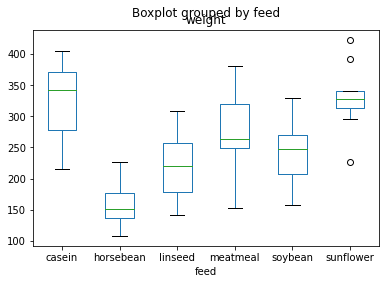

In [ ]:
boxplot = chickwts.boxplot(column='weight',by = 'feed', grid=False)

> chickwts 자료에서 linseed먹이를 먹은 닭 무게의 분산이 70^2이고 meatmeal먹이를 먹은 닭 무게의 분산이 75^2라고 알려진 경우 두집단의 모평균의 동일성 검정을 하여보자

In [ ]:
### x와 y의 평균
print(data_x.mean(),data_y.mean())

218.75 276.90909090909093


In [ ]:
### 두 모집단의 분산이 알려진 경우
# 함수 - 양측검정
def ztest_2sanmp(x, y, sigma_x, sigma_y):
  # 영가설하에서의 검정통계량
  t_0 = (x.mean()-y.mean()) / np.sqrt(sigma_x**2/x.size+sigma_y**2/y.size)
  #p-value
  p_single = stats.norm.cdf(t_0)
  p_double = p_single *2
  return (t_0, p_double)

In [ ]:
#검정결과 : (검정통계량, p-value)
ztest_2sanmp(x=data_x, y=data_y, sigma_x = 70, sigma_y = 75)

(-1.9177643081438704, 0.05514090335898941)

In [ ]:
### 두 모집단의 분산이 알려지지 않은 겨우
### 두 분산이 같은 경우
stats.ttest_ind(data_x, data_y)

Ttest_indResult(statistic=-2.377260681187378, pvalue=0.02702312877489196)

In [ ]:
###두 분산이 같지 않은 경우
stats.ttest_ind(data_x,data_y,equal_var=False)

Ttest_indResult(statistic=-2.3542177119900995, pvalue=0.029331439600825963)

linceed와 meatmeal의 평균은 다르다.

In [ ]:
data_file = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv'
sleep = pd.read_csv(data_file)
data_x = sleep.loc[sleep.group==1].extra
data_y = sleep.loc[sleep.group==2].extra

In [ ]:
sleep.head()

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5


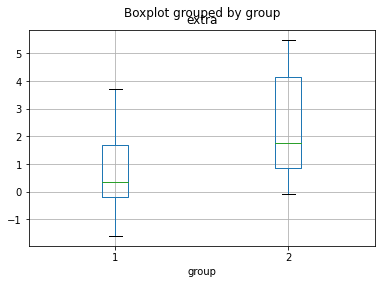

In [ ]:
###상자그림
boxplot = sleep.boxplot(column='extra',by='group')

In [ ]:
###x와 y의 평균
print(data_x.mean(),data_y.mean())

0.75 2.3299999999999996


In [ ]:
### 대응표본의 오평균 검정
stats.ttest_rel(data_x,data_y)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)